# HR Dataset - Statistics Review

## Explore the data

The data set we will use for this exercise comes from a Kaggle challenge and is often used for predictive analytics, namely to predict why the best and most experienced employees tend to leave the company.  We won't be using it for any predictive purposes here, but will instead use this data set to review many of the concepts explored in the Statistical Inference lectures.

This data contains fields for various measures of employee performance and reported satisfaction levels, as well as categorical variables for events and salary level.  For now, just explore the data a bit to get a general idea of what is going on.

In [60]:
# Import data science modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import statistics modules
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import poisson
import statsmodels.stats.api as sm
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp

In [2]:
# Read in csv
data = pd.read_csv('HR_comma_sep.csv')

# Print dimensions of data frame
print(data.shape)

# Print data types of each column
print(data.dtypes)

(14999, 10)
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object


In [3]:
# Print first few lines of data
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# Print description of data
data.describe(include = 'all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [5]:
# Correct column typos
data.rename(columns = {list(data)[3]: 'average_monthly_hours',
                       list(data)[5]: 'work_accident'}, inplace = True)

## Probability, Expectation Values, and Variance

The concepts of probability, expectation values, and variance are the bedrock of statistical inference.  Let's begin by employing some of these concepts to see if we can find some interesting paths to go down which may provide some insight into the inner workings of this company.

1. What is the probability that a randomly selected employee left the company?  What about experienced a work accident?  Also compute the probability that a randomly selected employee left the company and experienced a work accident.
1. Compute the 25th, 50th, and 90th percentiles for the satisfaction level score for all employees that left the company.  Compare these results to the same percentiles for those that did not leave.  What can you say about the results?
1. Compute the variance and standard deviation of hours worked.
1. Compare the variance between the satisfaction levels of employees who left versus those who stayed.  Which is larger?  What does this mean?
1. Compute the mean satisfaction level for each salary category.  Comment on your results.
1. Given an employees salary level (low, medium, or high), calculate the probability that they worked more than two standard deviations of the average monthly hours across all groups.  In other words, compute
$$P(hours > 2\sigma \vert salary ) = \dfrac{P(salary \vert hours > 2\sigma) P(hours > 2\sigma)}{P(salary)}$$
1. What can you say about your results in part 6?
1. Repeat parts 6 and 7 for 
$$P(left \vert salary ) = \dfrac{P(salary \vert left) P(left)}{P(salary)}$$
1. What is the odds ratio of an employee with a high salary getting a promotion within the past five years versus a low salary employee?  Comment on your results.
1. Suppose we were to pull a random sample of size 50 of employee satisfaction levels.  What would approximately be the mean of this sample?  What would be the mean of, say, 10 sets of random samples?  Demonstrate your assertions by writing some python code to do just that.

#### Question 1

In [6]:
# What is the probability that a randomly selected employee left the company?
num_employees = len(data)
left_company = data[data.left == 1]
len(left_company) / num_employees

0.2380825388359224

In [7]:
# What is the probability that a randomly selected employee experienced a work accident?
had_accident = data[data.work_accident == 1]
len(had_accident) / num_employees

0.1446096406427095

In [8]:
# Also compute the probability that a randomly selected employee left the company and experienced a work accident.
left_company_and_had_accident = data[(data.left == 1) & (data.work_accident == 1)]
len(left_company_and_had_accident) / num_employees

0.01126741782785519

#### Question 2

In [9]:
# Compute 25th, 50th, and 90th percentiles for the satisfaction level score for all employees that left the company.
print('Employees that left company')
print('25% percentile: {}'.format(np.percentile(left_company.satisfaction_level, 25)))
print('50% percentile: {}'.format(np.percentile(left_company.satisfaction_level, 50)))
print('90% percentile: {}'.format(np.percentile(left_company.satisfaction_level, 90)))

Employees that left company
25% percentile: 0.13
50% percentile: 0.41
90% percentile: 0.84


In [10]:
# Compare these results to the same percentiles for those that did not leave.
stayed_at_company = data[data.left == 0]

print('Employees that stayed at company')
print('25% percentile: {}'.format(np.percentile(stayed_at_company.satisfaction_level, 25)))
print('50% percentile: {}'.format(np.percentile(stayed_at_company.satisfaction_level, 50)))
print('90% percentile: {}'.format(np.percentile(stayed_at_company.satisfaction_level, 90)))

Employees that stayed at company
25% percentile: 0.54
50% percentile: 0.69
90% percentile: 0.94


Employees who are overall more satisfied appear more likely to stay at the company.

#### Question 3

In [11]:
# Compute the variance and standard deviation of hours worked.
data.average_monthly_hours.agg(['var', 'std'])

var    2494.313175
std      49.943099
Name: average_monthly_hours, dtype: float64

#### Question 4

In [12]:
# Compare variance between the satisfaction levels of employees who left versus those who stayed. Which is larger?
data.groupby('left').satisfaction_level.var()

left
0    0.047134
1    0.069661
Name: satisfaction_level, dtype: float64

There is larger variance in satisfaction levels among employees who leave the company, suggesting that employees may leave for a variety of reasons which include but are not limited to low satisfaction levels.

#### Question 5

In [13]:
# Compute the mean satisfaction level for each salary category.
data.groupby('salary').satisfaction_level.mean()

salary
high      0.637470
low       0.600753
medium    0.621817
Name: satisfaction_level, dtype: float64

Mean satisfaction levels are highest in the 'high' salary group and decrease with each successive salary stepoff. This suggests that employee satisfaction on average correlates with salary category.

#### Question 6

Calculate statistics for comparison

In [14]:
# Compute overall avg and sd for average monthly hours worked, avg plus 2 sd
avg_hrs, sd_hrs = data.average_monthly_hours.agg(['mean', 'std'])
print("Average monthly hours: {:.2f}".format(avg_hrs))
print("Standard deviation of monthly hours: {:.2f}".format(sd_hrs))

Average monthly hours: 201.05
Standard deviation of monthly hours: 49.94


In [15]:
avg_plus_2sd = avg_hrs + (2 * sd_hrs)
print("Average plus 2 standard deviations: {:.2f} hours".format(avg_plus_2sd))

Average plus 2 standard deviations: 300.94 hours


Calculate individual pieces needed for equation

In [16]:
# Compute probability that employee worked > 2 sds of avg monthly hours
p_gt2sd = len(data[data.average_monthly_hours > avg_plus_2sd]) / num_employees
p_gt2sd

0.01060070671378092

In [17]:
# Compute probability that employee is within a particular salary bracket
p_salary = data.salary.value_counts() / num_employees
p_salary

low       0.487766
medium    0.429762
high      0.082472
Name: salary, dtype: float64

In [18]:
# Compute probability that the avg monthly hrs for a salary bracket is > 2 sds of overall avg mean
num_salary_gt2sd = data[data.average_monthly_hours > avg_plus_2sd].salary.value_counts()
num_total_gt2sd = len(data[data.average_monthly_hours > avg_plus_2sd])
p_salary_given_gt2sd = num_salary_gt2sd / num_total_gt2sd
p_salary_given_gt2sd

low       0.622642
medium    0.364780
high      0.012579
Name: salary, dtype: float64

Calculate equation: $$P(hours > 2\sigma \vert salary ) = \dfrac{P(salary \vert hours > 2\sigma) P(hours > 2\sigma)}{P(salary)}$$

In [19]:
# Given employee salary level, compute probability that they worked > 2 sds of avg monthly hrs across all groups
p_gt2sd_given_salary = (p_salary_given_gt2sd * p_gt2sd) / p_salary
p_gt2sd_given_salary

low       0.013532
medium    0.008998
high      0.001617
Name: salary, dtype: float64

#### Question 7

What can you say about your results in part 6?
* The numbers of employees that fall into each salary category need to be taken into account in the calculation, as a given employee is dramatically less likely to fall in the 'high' salary bracket than in the 'low' or 'medium' salary brackets. When the probability of salary level is accounted for in the equation, it appears that there is a distinct increase in likelihood of working greater than 2 standard deviations of the mean number of working hours with decreasing pay scale.

#### Question 8

Calculate individual pieces needed for equation (recalculating p_left from above)

In [20]:
# Probability that an employee left company
p_left = len(data[data.left == 1]) / len(data)
p_left

0.2380825388359224

In [21]:
# Compute avg probability for each salary bracket leaving company
num_salary_left = data[data.left == 1].salary.value_counts()
num_total_left = len(data[data.left == 1])
p_salary_given_left = num_salary_left / num_total_left
p_salary_given_left

low       0.608233
medium    0.368804
high      0.022963
Name: salary, dtype: float64

Calculate equation: $$P(left \vert salary ) = \dfrac{P(salary \vert left) P(left)}{P(salary)}$$

In [22]:
# Given employee salary level, compute probability that they left the company
p_left_given_salary = (p_salary_given_left * p_left) / p_salary
p_left_given_salary

low       0.296884
medium    0.204313
high      0.066289
Name: salary, dtype: float64

What can you say about your results?
* Again, the numbers of employees that fall into each salary category need to be taken into account in the calculation, as a given employee is dramatically less likely to fall in the 'high' salary bracket than in the 'low' or 'medium' salary brackets. When the probability of salary level is accounted for in the equation, it appears that employees in the 'high' salary group are by far less likely to leave the company, where the 'low' and 'medium' groups are much more similar (although higher pay still appears to slightly decrease likelihood of leaving).

#### Question 9

In [23]:
# Compute proportions of each salary bracket either getting or not getting salary in last 5 years
pro_by_salary = data[data.promotion_last_5years == 1].salary.value_counts() / data.salary.value_counts()
not_pro_by_salary = data[data.promotion_last_5years == 0].salary.value_counts() / data.salary.value_counts()

# Calculate odds ratio of high salary employee getting promotion versus that of low salary employee
(pro_by_salary['high'] / not_pro_by_salary['high']) / (pro_by_salary['low'] / not_pro_by_salary['low'])

6.788919235271166

Comment on your results.
* Employees in the 'high' salary bracket are over 6.5 times more likely to get a promotion in the next 5 years than those in the 'low' salary bracket. It appears more difficult to start climbing the company ladder than to continue rising once past a particular threshold.

#### Question 10

In [24]:
# Compute the mean of a random sample of size 50 of employee satisfaction samples
data.sample(50).satisfaction_level.mean()

0.6245999999999999

In [25]:
# Compute the means of 10 sets of random samples of size 50 of employee satisfaction levels
sample_means = [data.sample(50).satisfaction_level.mean() for i in range(10)]
sample_means

[0.5592,
 0.6128,
 0.6334000000000001,
 0.6426,
 0.5566,
 0.5537999999999998,
 0.628,
 0.6061999999999999,
 0.617,
 0.5870000000000002]

In [26]:
# Compute the overall mean of the 10 sample means
np.mean(sample_means)

0.59966000000000008

## Distributions and The Central Limit Theorem
### The Bernoulli Distribution
Bernoulli distributions are the result of a random variable with a binary outcome, like a coin flip or medical test giving a positive or negative result.  Typically we represent the outcomes of a Bernoulli Random variable $X$ of only taking values of 0 or 1, with probabilities $p$ and $1 - p$ respectively, mean $p$, variance $p(1 - p)$, and PMF given by

$$ P(X = x) = p^x (1 - p)^{1 - x} $$

Where $x$ is the outcome and $p$ is the probability of the positive outcome (1).

Bernoulli random variables crop up very often in statistical analysis &mdash; most often in the form of Binomial trials, or, as a sum of independent Bernoulli variables with PMF given by 
$$ P(X = x) = {n \choose x} p^x (1 - p)^{n - x} $$
where
$$ {n \choose x} = \frac{n!}{x!(n - x)!} $$
In this exercise you'll take a look at the HR data and apply these concepts to gain some insight.

Using the HR data, answer the following.
1. Which variables in the HR data can be said to be Bernoulli random variables?
2. For the variables you identified in part 1, compute the probabilities $p_k$, of each having a positive $(x = 1)$ result, where $k$ is a placeholder for each variable.
3. Compute the variance of each of the variables in part 2 using $p_k$ as described above.
4. For each of the k variables, compute the probability of randomly selecting 3500 employees with a positive result.  Comment on your answer.
5. For each of the k variables, compute the probability of randomly selecting 3500 **or less** with a positive result.  Comment on your answer.
6. Now plot both the PMF and CDF as a function of the number of drawn samples for each of the k variables.  Comment on your results.

#### Question 1

Which variables in the HR data can be said to be Bernoulli random variables?
- work_accident
- left
- promotion_last_5years

#### Question 2

In [27]:
# Probability p of each variable having a positive result
p = data[['work_accident', 'left', 'promotion_last_5years']].mean()
p

work_accident            0.144610
left                     0.238083
promotion_last_5years    0.021268
dtype: float64

#### Question 3

In [28]:
# Compute the variance of each using Bernoulli equation
var = p * (1 - p)
var

work_accident            0.123698
left                     0.181399
promotion_last_5years    0.020816
dtype: float64

#### Question 4

In [29]:
# Dictionary to hold probabilies of randomly selecting 3500 positive results for each of k variables
b = {}
# Iterate through the p values for each variable and add probability to dictionary
for x in p.to_dict():
    # Instantiate a binomial distribution using our parameters for this variable
    myBinom = binom(n = num_employees, p = p[x])
    # Calculate probability of selecting 3500 employees
    b[x] = myBinom.pmf(3500)
b

{'left': 0.0030366192962612546,
 'promotion_last_5years': 0.0,
 'work_accident': 3.3494533716445012e-183}

Comment on your results.
* It is all but impossible to select exactly 3500 employees with a promotion in the last 5 years or a work accident. While still very unlikely, there is a much higher chance of selecting exactly 3500 employees who have left the company.

#### Question 5

In [30]:
# Dictionary to hold probabilies of randomly selecting 3500 or less positive results for each of k variables
b = {}
# Iterate through the p values for each variable and add probability to dictionary
for x in p.to_dict():
    # Instantiate a binomial distribution using our parameters for this variable
    myBinom = binom(n = num_employees, p = p[x])
    # Calculate probability of selecting 3500 employees
    b[x] = myBinom.cdf(3500)
b

{'left': 0.088031181043273107,
 'promotion_last_5years': 0.99999999999999989,
 'work_accident': 0.99999999999999989}

Comment on your results
* There is an extremely high chance of drawing up to 3500 employees with a promotion in the last 5 years or a work accident while a much lower chance of drawing up to 3500 employees who have left the company.

#### Question 6

In [31]:
# Dictionary to hold PMF probabilies of randomly selecting j positive results for each of k variables
b_pmf = {}
# Iterate through the p values for each variable and add probability to dictionary
for x in p.to_dict():
    # Store y-axis variables in list
    y = []
    # Iterate through range of total number of employees
    for j in range(num_employees):
        # Create binomial distribution with p = p[variable name]
        myBinom = binom(n = num_employees, p = p[x])
        # Append the probability of j successes to y-values
        y.append(myBinom.pmf(j))
    # Add y-values for current variable to dictionary
    b_pmf[x] = y

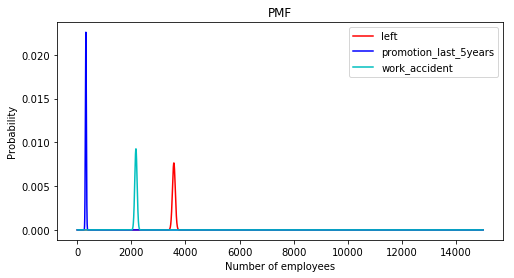

In [32]:
# Plot figure of PMF values
plt.figure(figsize=(8, 4))
plt.plot(b_pmf['left'], 'r', label = 'left')
plt.plot(b_pmf['promotion_last_5years'], 'b', label = 'promotion_last_5years')
plt.plot(b_pmf['work_accident'], 'c', label = 'work_accident')

# Plot legend and title, show figure
plt.legend()
plt.ylabel('Probability')
plt.xlabel('Number of employees')
plt.title('PMF')
plt.show()

In [33]:
# Dictionary to hold CDF probabilies of randomly selecting j positive results for each of k variables
b_cdf = {}
# Iterate through the p values for each variable and add probability to dictionary
for x in p.to_dict():
    # Store y-axis variables in list
    y = []
    # Iterate through range of total number of employees
    for j in range(num_employees):
        # Create binomial distribution with p = p[variable name]
        myBinom = binom(n = num_employees, p = p[x])
        # Append the probability of j successes to y-values
        y.append(myBinom.cdf(j))
    # Add y-values for current variable to dictionary
    b_cdf[x] = y

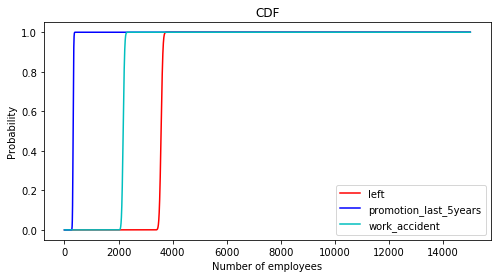

In [34]:
# Plot figure of CDF values
plt.figure(figsize=(8, 4))
plt.plot(b_cdf['left'], 'r', label = 'left')
plt.plot(b_cdf['promotion_last_5years'], 'b', label = 'promotion_last_5years')
plt.plot(b_cdf['work_accident'], 'c', label = 'work_accident')

# Plot legend and title, show figure
plt.legend()
plt.ylabel('Probability')
plt.xlabel('Number of employees')
plt.title('CDF')
plt.show()

In [35]:
# View expected values
p * num_employees

work_accident            2169.0
left                     3571.0
promotion_last_5years     319.0
dtype: float64

Comment on your results.
* The PMF and CDF both show the highest spike at the expected mean of the distribution.

### The Normal Distribution
The Normal distribution (or sometimes called the Bell Curve or Gaussian) is by far the most prevalent and useful distribution in any field that utilizes statistical techniques.  In fact, in can be shown that the means of random variables sampled repeatedly from **any** distribution eventually form a normal given a sufficiently large sample size.

A normal distribution is characterized by the PDF given by
$$p(x|\mu,\sigma) = \frac{1}{\sqrt{(2\pi\sigma^2)}}e^{-\frac{(x - \mu)^2}{2\sigma^2}} $$

where $\mu$ is the mean and $\sigma^2$ is the variance, thus the distribution is characterized by mean and variance alone.  In this exercise, you'll examine some of the variables in the HR dataset and construct some normal distributions approximating them.

Using the HR data, answer the following

1. Which variables may be approximately normal?
2. For the variables in part 1, plot some histograms.
3. Compute the mean and variance for each of the variables used in parts 1 and 2.
4. Using the mean and variance in part 3, construct normal distributions for each and overlay them on top of the histograms you made in part one.  Are they well approximated by normals?

#### Question 1

Which variables may be approximately normal?
* satisfaction_level
* last_evaluation
* average_monthly_hours

#### Question 2

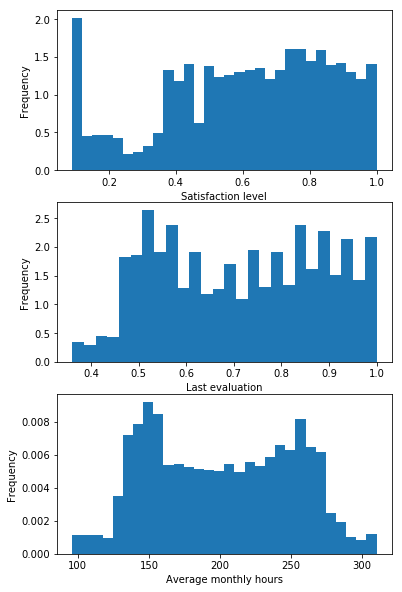

In [36]:
# Set subplots for histograms of each normal variable
f, ax = plt.subplots(3, 1, figsize = (6, 10))

# Plot satisfaction level
ax[0].hist(data.satisfaction_level, normed = True, bins = 'auto')
ax[0].set_xlabel('Satisfaction level')
ax[0].set_ylabel('Frequency')

# Plot last evaluation
ax[1].hist(data.last_evaluation, normed = True, bins = 'auto')
ax[1].set_xlabel('Last evaluation')
ax[1].set_ylabel('Frequency')

# Plot average monthly hours
ax[2].hist(data.average_monthly_hours, normed = True, bins = 'auto')
ax[2].set_xlabel('Average monthly hours')
ax[2].set_ylabel('Frequency')

# Show plots
plt.show()

#### Question 3

In [37]:
# Select data for each of the variables used in parts 1 and 2
norm_data = data[['satisfaction_level', 'last_evaluation', 'average_monthly_hours']]

In [38]:
# Compute the mean for each of the variables used in parts 1 and 2.
norm_means = norm_data.mean()
norm_means

satisfaction_level         0.612834
last_evaluation            0.716102
average_monthly_hours    201.050337
dtype: float64

In [39]:
# Compute the variance for each of the variables used in parts 1 and 2.
norm_vars = norm_data.var()
norm_vars

satisfaction_level          0.061817
last_evaluation             0.029299
average_monthly_hours    2494.313175
dtype: float64

In [40]:
# Compute the standard deviation for each of the variables used in parts 1 and 2.
norm_std = norm_data.std()
norm_std

satisfaction_level        0.248631
last_evaluation           0.171169
average_monthly_hours    49.943099
dtype: float64

#### Question 4

In [41]:
# Create dictionary to hold normal distributions for each variable
norms = {}
# Create dictionary to hold sequence of evenly spaced x-values for each variable
x = {}
# Iterate over the variables
for col in norm_data:
    # Create normal distribution for current variable
    norms[col] = norm(loc = norm_means[col], scale = norm_std[col])
    # Add sequence for current variable to x-values
    x[col] = np.linspace(norms[col].ppf(0.01), norms[col].ppf(0.99), 100)

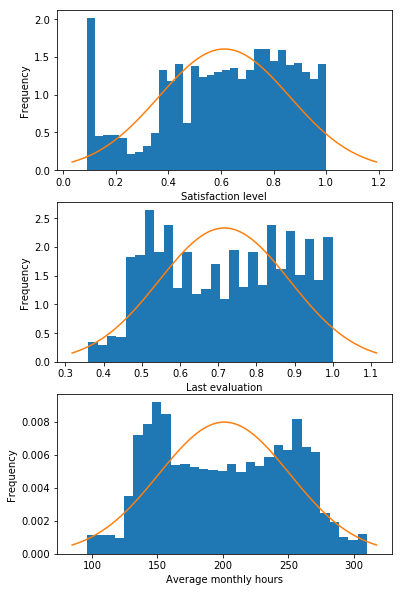

In [42]:
# Set subplots for histograms and associated normal distributions of each normal variable
f, ax = plt.subplots(3, 1, figsize = (6, 10))

# Plot satisfaction level and associated normal distribution
ax[0].hist(data.satisfaction_level, normed = True, bins = 'auto')
ax[0].plot(x['satisfaction_level'], norms['satisfaction_level'].pdf(x['satisfaction_level']))
ax[0].set_xlabel('Satisfaction level')
ax[0].set_ylabel('Frequency')

# Plot last evaluation and associated normal distribution
ax[1].hist(data.last_evaluation, normed = True, bins = 'auto')
ax[1].plot(x['last_evaluation'], norms['last_evaluation'].pdf(x['last_evaluation']))
ax[1].set_xlabel('Last evaluation')
ax[1].set_ylabel('Frequency')

# Plot average monthly hours and associated normal distribution
ax[2].hist(data.average_monthly_hours, normed = True, bins = 'auto')
ax[2].plot(x['average_monthly_hours'], norms['average_monthly_hours'].pdf(x['average_monthly_hours']))
ax[2].set_xlabel('Average monthly hours')
ax[2].set_ylabel('Frequency')

# Show plots
plt.show()

Are the variables well approximated by normals?
* Satisfaction level is well approximated by a normal, albeit with an overall skew toward higher scores and a spike at extreme lows.
* Last evaluation appears to be primarily bimodal, with one peak around 0.5 and another near the top scores.
* Although there is a clear bimodal distribution in average monthly hours, the overall trend follows the normal trends of symmetry at the tails most closely to all of the variables.

### The Poisson Distribution
The Poisson distribution is very versatile but is typically used to model counts per unit time or space, such as the number of ad clicks or arriving flights, each per unit time. It has a PDF given by
$$ P(X = x, \lambda) = \frac{\lambda^x e^{-\lambda}}{x!} $$
where the mean and variance are both equal to $\lambda$

Using the HR data, answer the following.

1. What variables would be good candidates for modeling with a Poisson distribution?
2. For each variable in part 1, divide each by salary and fit a Poisson distribution to each.
3. For each salary level, compute the probability of obtaining at least the mean of each variable &mdash; regardless of salary level &mdash; by using the Poisson distributions you constructed in part 2.  Comment on your results.

#### Question 1

What variables would be good candidates for modeling with a Poisson distribution?
* number_project
* time_spend_company

#### Question 2

In [43]:
# For each variable in part 1, divide each by salary and fit a Poisson distribution to each.
poisson_vars = ['number_project', 'time_spend_company']
poisson_data = data[['number_project', 'time_spend_company', 'salary']]

# Create dictionary to store distributions for each Poisson variable
poisson_dists = {}
for poisson_var in poisson_vars:
    # Dictionary to hold distribution for each salary level for current variable
    salary_dists = {}
    # Iterate over each salary category
    for salary_level in data.salary.unique():
        # Mean for current salary level of current Poisson variable
        mu = poisson_data[poisson_var][poisson_data.salary == salary_level].mean()
        # Add Poisson distribution for mu
        salary_dists[salary_level] = poisson(mu = mu)
        # Print current variable, category, mean
        print(poisson_var, salary_level, mu)
    # Add distributions for current Poisson variable
    poisson_dists[poisson_var] = salary_dists

number_project low 3.799890650628759
number_project medium 3.8135277691591685
number_project high 3.767178658043654
time_spend_company low 3.4382176052487696
time_spend_company medium 3.52901023890785
time_spend_company high 3.692805173807599


#### Question 3

In [44]:
# Create dictionary to hold probabilities of obtaining at least mean of each variable by salary level
poisson_probs = {}
# Iterate over Poisson variables
for poisson_var in poisson_vars:
    # Get current mean
    variable_mean = poisson_data[poisson_var].mean()
    # Dict to hold probabilities for each salary category for current variable
    probs_cat = {}
    # Iterate over categories
    for salary_level in data.salary.unique():
        # Compute probability using survival function
        probs_cat[salary_level] = poisson_dists[poisson_var][salary_level].sf(variable_mean)
    # Add dict of probs for current variable
    poisson_probs[poisson_var] = probs_cat
poisson_probs

{'number_project': {'high': 0.5197772989110967,
  'low': 0.52649278489553697,
  'medium': 0.52927882346076038},
 'time_spend_company': {'high': 0.50434403111681059,
  'low': 0.44997869146511071,
  'medium': 0.4696141528359114}}

Comment on your results.
* number_project: Employees in the 'high' salary group are the least likely to have more than average numbers of projects. 'Medium' salary employees have the highest probability, although that robability is very similar to the 'low' salary employee group.
* time_spend_company: It appears that the longer an employee has spent at the company, the more likely they are to be in a higher-paid salary category.

### The Central Limit Theorem
The Central Limit Theorem is perhaps one of the most remarkable results in statistics and mathematics in general.  In short, it says that the distribution of means of independent random variables, sampled from **any** distribution, tends to approach a normal distribution as the sample size increases.

An example of this would be taking a pair of dice, rolling them, and recording the mean of each result.  The Central Limit Theorem states, that after enough rolls, the distribution of the means will be approximately normal.  Stated formally, the result is
    $$ \bar{X_n} \sim N(\mu, \sigma^2/n) = \frac{\sqrt{n}}{\sigma \sqrt{2\pi}}e^{-n(\bar{X_n} - \mu)^2/\sigma^2}$$
In this exercise, you'll conduct some simulation experiments to explore this idea.

Using the HR data, answer the following.
1. Choose two variables which may be good candidates to test this theorem.
2. Using the variables chosen in part 1, randomly select a set of `n = 10` samples and take the mean.  Repeat this 1000 times for each variable.
3. Plot a histogram for each variable used in part 2.  Comment on your results.
4. Repeat parts 2-3 for `n = 100`, `n = 500`, and `n = 1000`.  Comment on your results.
5. Overlay an normal curve on your `n = 1000` plots, using the mean and variance computed from the data.  Comment on your results.

#### Question 1

Choose two variables which may be good candidates to test this theorem.
* average_monthly_hours (continuous)
* number_project (discrete)

#### Question 2

In [45]:
# Select data frame with data to be used in CLT questions
clt_data = data[['average_monthly_hours', 'number_project']]

In [46]:
# Using the variables chosen in part 1, randomly select a set of `n = 10` samples and take the mean 1000 times each.
clt_means = {}
for clt_var in clt_data:
    # Ssmple size 10; take mean 1000 times
    clt_means[clt_var] = [clt_data[clt_var].sample(10).mean() for i in range(1000)]

#### Question 3

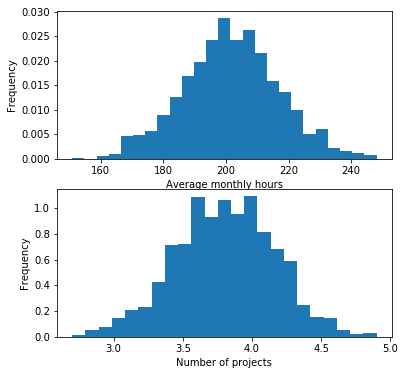

In [47]:
# Plot a histogram for each variable used in part 2.
f, ax = plt.subplots(2, 1, figsize = (6, 6))

# Plot average monthly hours
ax[0].hist(clt_means['average_monthly_hours'], normed = True, bins = 'auto')
ax[0].set_xlabel('Average monthly hours')
ax[0].set_ylabel('Frequency')

# Plot number of projects
ax[1].hist(clt_means['number_project'], normed = True, bins = 'auto')
ax[1].set_xlabel('Number of projects')
ax[1].set_ylabel('Frequency')

# Show plot
plt.show()

Comment on your results.
* The data appear much more normally distributed through this method than in the original, as expected by the central limit theorem.

#### Question 4

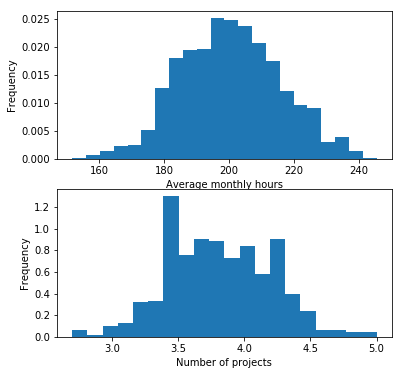

In [48]:
# Repeat parts 2-3 for `n = 100`.
clt_means_100 = {}
for clt_var in clt_data:
    # Ssmple size 100; take mean 1000 times
    clt_means_100[clt_var] = [clt_data[clt_var].sample(10).mean() for i in range(1000)]
    

# Plot a histogram for each variable.
f, ax = plt.subplots(2, 1, figsize = (6, 6))

# Plot average monthly hours
ax[0].hist(clt_means_100['average_monthly_hours'], normed = True, bins = 'auto')
ax[0].set_xlabel('Average monthly hours')
ax[0].set_ylabel('Frequency')

# Plot number of projects
ax[1].hist(clt_means_100['number_project'], normed = True, bins = 'auto')
ax[1].set_xlabel('Number of projects')
ax[1].set_ylabel('Frequency')

# Show plot
plt.show()

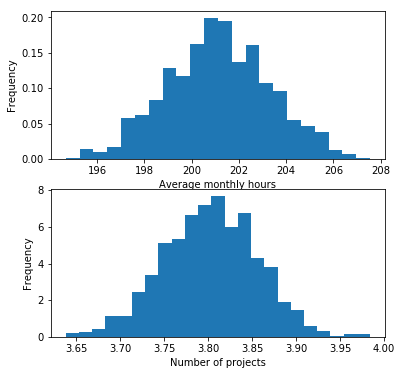

In [49]:
# Repeat parts 2-3 for `n = 500`.
clt_means_500 = {}
for clt_var in clt_data:
    # Ssmple size 500; take mean 1000 times
    clt_means_500[clt_var] = [clt_data[clt_var].sample(500).mean() for i in range(1000)]
    
    
# Plot a histogram for each variable.
f, ax = plt.subplots(2, 1, figsize = (6, 6))

# Plot average monthly hours
ax[0].hist(clt_means_500['average_monthly_hours'], normed = True, bins = 'auto')
ax[0].set_xlabel('Average monthly hours')
ax[0].set_ylabel('Frequency')

# Plot number of projects
ax[1].hist(clt_means_500['number_project'], normed = True, bins = 'auto')
ax[1].set_xlabel('Number of projects')
ax[1].set_ylabel('Frequency')

# Show plot
plt.show()

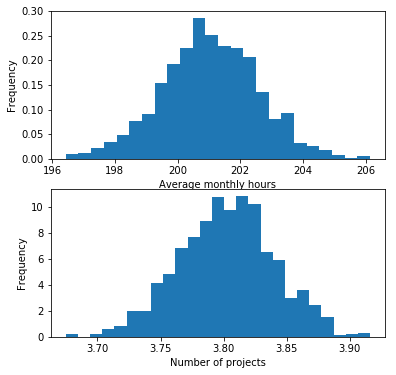

In [50]:
# Repeat parts 2-3 for `n = 1000`.
clt_means_1000 = {}
for clt_var in clt_data:
    # Ssmple size 1000; take mean 1000 times
    clt_means_1000[clt_var] = [clt_data[clt_var].sample(1000).mean() for i in range(1000)]
    

# Plot a histogram for each variable.
f, ax = plt.subplots(2, 1, figsize = (6, 6))

# Plot average monthly hours
ax[0].hist(clt_means_1000['average_monthly_hours'], normed = True, bins = 'auto')
ax[0].set_xlabel('Average monthly hours')
ax[0].set_ylabel('Frequency')

# Plot number of projects
ax[1].hist(clt_means_1000['number_project'], normed = True, bins = 'auto')
ax[1].set_xlabel('Number of projects')
ax[1].set_ylabel('Frequency')

# Show plot
plt.show()

Comment on your results.
* As expected, the distributions become more and more normally distributed as larger sample sizes are drawn from the population.

#### Question 5

In [51]:
# Compute the mean and variance (standard deviation) from the data for creating normal curves
clt_data_mean = clt_data.mean()
clt_data_stds = clt_data.std()

# Create dictionary to hold normal distributions
clt_normals = {}
# Create dictionary to hold sequence of evenly spaced x-values for each variable
x = {}
# Iterate over the variables
for col in clt_data:
    # Create normal distribution for current variable
    clt_normals[col] = norm(loc = clt_data_mean[col], scale = clt_data_stds[col]/np.sqrt(1000))
    # Add sequence for current variable to x-values
    x[col] = np.linspace(clt_normals[col].ppf(0.01), clt_normals[col].ppf(0.99), 100)

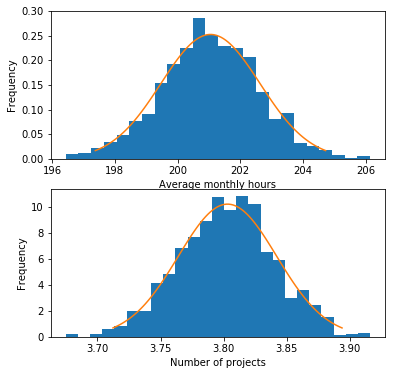

In [52]:
# Overlay an normal curve on your `n = 1000` plots
f, ax = plt.subplots(2, 1, figsize = (6, 6))

# Plot average monthly hours
ax[0].hist(clt_means_1000['average_monthly_hours'], normed = True, bins = 'auto')
ax[0].plot(x['average_monthly_hours'], clt_normals['average_monthly_hours'].pdf(x['average_monthly_hours']))
ax[0].set_xlabel('Average monthly hours')
ax[0].set_ylabel('Frequency')

# Plot number of projects
ax[1].hist(clt_means_1000['number_project'], normed = True, bins = 'auto')
ax[1].plot(x['number_project'], clt_normals['number_project'].pdf(x['number_project']))
ax[1].set_xlabel('Number of projects')
ax[1].set_ylabel('Frequency')

# Show plot
plt.show()

Comment on your results.
* The distribution of 1000 samples is well-approximated by a normal distribution.

## Hypothesis Testing
Hypothesis testing is essentially using the data to answer questions of interest.  For example, does a new medication provide any benefit over placebo?  Or is a subset of the population disproportionately more susceptible to a particular disease?  Or is the difference between two companies profits' significant or due to chance alone?

Before doing some hypothesis testing on the HR data, recall that hypothesis typically come in pairs of the form $H_0$, called the null hypothesis, versus $H_a$, called the alternative hypothesis.  The null hypothesis represents the "default" assumption -- that a medication has no effect for example, while the alternative hypothesis represents what exactly we are looking to discover, in the medication case, whether it provides a significant benefit.  Another common case is testing the difference between two means.  Here, the null hypothesis is that there is no difference between two population means, whereas the alternative hypothesis is that there is a difference.  Stated more precisely
$$H_0: \mu_1 - \mu_2 = 0$$
$$H_a: \mu_1 - \mu_2 \ne 0$$

Hypotheses are usually tested by constructing a confidence interval around the test statistic and selecting a "cut-off" significance level denoted $\alpha$.  A typical $\alpha$ significance is 0.05 and is often called a "p-value".  If a test produces a p-value of $\alpha$ or below, then the null hypothesis can be rejected, strengthening the case of the alternative hypothesis.  It is very important to remember that hypothesis testing can only tell you if your hypothesis is statistically significant -- this does **not** mean that your result may be scientifically significant which requires much more evidence.

In this exercise you'll explore the HR data more and test some hypothesis.

Using the HR data, answer the following.

1. Compute a confidence interval for satisfaction levels, at the 95% confidence level, of employees who left the company and those who didn't.  Do this using both a t distribution and a normal.  Comment on your results.
2. Use a t-test to test the hypothesis that employees who left the company, had lower satisfaction levels than those who did not.  If significant, is the mean difference?  Comment on your results.  (Hint: Do the two populations have equal variance?)
3. Fit a normal curve to each group in part 2 and put them on the same plot next to each other.  Comment on your results.
4. Test the hypothesis that the satisfaction level between each salary group, denoted k, differs signicantly from the mean.  Namely
    - $H_0: \mu - \mu_k = 0$
    - $H_a: \mu - \mu_k \ne 0$
5. How would you interpret your results in part 5?
6. Generate plots for part 5 as you did in part 3.  What conclusions can you draw from the plot?
7. Repeat parts 4-6 on a hypothesis of your choosing.
8. Recall that Power is the probability of failing to reject the null hypothesis when it is false (thus more power is good).  Compute the power for the hypothesis that the satisfaction level of high paid employees is different than that of medium paid employees using a t distribution.

#### Question 1

In [53]:
# Compute 95% CI for satisfaction levels of employees who did and didn't leave company using t-distribution.
{'stayed': sm.DescrStatsW(data[data.left == 0].satisfaction_level).tconfint_mean(alpha = 0.05),
 'left': sm.DescrStatsW(data[data.left == 1].satisfaction_level).tconfint_mean(alpha = 0.05)}

{'left': (0.43143847133170987, 0.44875755219111291),
 'stayed': (0.66282873590383395, 0.6707904450552139)}

In [54]:
# Compute 95% CI for satisfaction levels of employees who did and didn't leave company using normal distribution.
{'stayed': sm.DescrStatsW(data[data.left == 0].satisfaction_level).zconfint_mean(alpha = 0.05),
 'left': sm.DescrStatsW(data[data.left == 1].satisfaction_level).zconfint_mean(alpha = 0.05)}

{'left': (0.43144140722566182, 0.44875461629716096),
 'stayed': (0.66282915756106564, 0.67079002339798222)}

Comment on your results.
* The results from the t-distribution and normal distribution are not noticably different in this case.
* Employees who left the company had lower satisfaction levels (with non-overlapping confidence intervals) than the employees who stayed.

#### Question 2

In [55]:
# Use t-test to test hypothesis that employees who left company had lower satisfaction levels than those who did not.
ttest_ind(data[data.left == 0].satisfaction_level, data[data.left == 1].satisfaction_level, equal_var = False)

Ttest_indResult(statistic=46.636414352775716, pvalue=0.0)

In [56]:
# Since the result is significant, are the means different? 
data[data.left == 0].satisfaction_level.mean() - data[data.left == 1].satisfaction_level.mean()

0.22671157871810688

Comment on your results.
* There is a highly significant difference in the satisfaction levels of employees who left the company versus those who stayed (p-value near zero). This is a one-sided test, which is defined as the returned t-test divided by 2. However, $\frac0 2$ is still equal to $0$.
* Employees who stayed at the company had a satisfaction level of approximately 0.23 greater than those employees who left.

#### Question 3

In [57]:
# Fit a normal curve to each group in part 2 and put them on the same plot next to each other.
satisfaction_means = {'stayed': data[data.left == 0].satisfaction_level.mean(),
                      'left': data[data.left == 1].satisfaction_level.mean()}
satisfaction_stds = {'stayed': data[data.left == 0].satisfaction_level.std() / np.sqrt(len(data[data.left == 0])),
                     'left': data[data.left == 1].satisfaction_level.std() / np.sqrt(len(data[data.left == 1]))}

normals = {}
x = {}
for key in satisfaction_means.keys():
    # Create and store normal distribution based on current mean and std
    normals[key] = norm(loc = satisfaction_means[key], scale = satisfaction_stds[key])
    # Create and store uniformly-spaced x-values
    x[key] = np.linspace(normals[key].ppf(0.01), normals[key].ppf(0.99), 100)

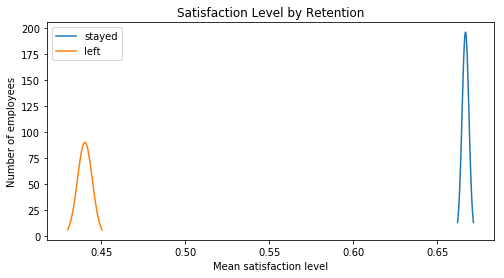

In [58]:
# Plot results
plt.figure(figsize=(8, 4))
plt.plot(x['stayed'], normals['stayed'].pdf(x['stayed']), label = 'stayed')
plt.plot(x['left'], normals['left'].pdf(x['left']), label = 'left')

# Add annotation
plt.title('Satisfaction Level by Retention')
plt.xlabel('Mean satisfaction level')
plt.ylabel('Number of employees')
plt.legend()

# Show plot
plt.show()

Comment on your results.
* The two distributions are far from each other and completely nonoverlapping, which is consistent with the results of the t-tests.

#### Question 4

In [84]:
# Create dictionary to hold t-tests of whether satisfaction level of each salary level varies from overall mean. 
t_tests = {}

# Calculate overall mean
overall_mean = data.satisfaction_level.mean()
print('overall mean: {}'.format(overall_mean))

# Iterate over salary levels
for salary_level in data.salary.unique():
    # Perform t-test for each salary level and add to dictionary
    t_tests[salary_level] = ttest_1samp(data[data.salary == salary_level].satisfaction_level, overall_mean)
t_tests

overall mean: 0.6128335222348166


{'high': Ttest_1sampResult(statistic=3.8205997501861702, pvalue=0.00013974368695866474),
 'low': Ttest_1sampResult(statistic=-4.0585381216022212, pvalue=4.9895149767038095e-05),
 'medium': Ttest_1sampResult(statistic=2.9429521364929117, pvalue=0.0032625787024487714)}

#### Question 5

How would you interpret your results in part 5?
* Each salary level has a satisfaction level significantly (p < 0.05) different from the overall mean satisfaction level. This implies that satisfaction level and salary level are correlated.
* The null hypothesis is rejected at a p-value of 0.05.

#### Question 6

In [68]:
# Generate plots for part 5 as you did in part 3.
satisfaction_means = {'low': data[data.salary == 'low'].satisfaction_level.mean(),
                      'medium': data[data.salary == 'medium'].satisfaction_level.mean(),
                      'high': data[data.salary == 'high'].satisfaction_level.mean()}
satisfaction_stds = {'low': data[data.salary == 'low'].satisfaction_level.std() /
                             np.sqrt(len(data[data.salary == 'low'])),
                     'medium': data[data.salary == 'low'].satisfaction_level.std() /
                                 np.sqrt(len(data[data.salary == 'medium'])),
                     'high': data[data.salary == 'low'].satisfaction_level.std() /
                             np.sqrt(len(data[data.salary == 'high']))}

normals = {}
x = {}
for key in satisfaction_means.keys():
    # Create and store normal distribution based on current mean and std
    normals[key] = norm(loc = satisfaction_means[key], scale = satisfaction_stds[key])
    # Create and store uniformly-spaced x-values
    x[key] = np.linspace(normals[key].ppf(0.01), normals[key].ppf(0.99), 100)

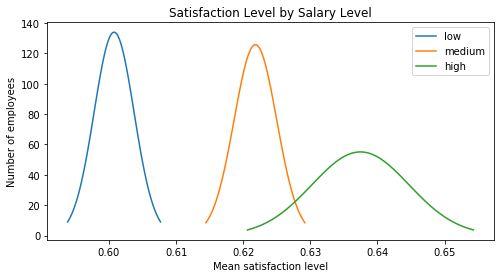

In [69]:
# Plot results
plt.figure(figsize=(8, 4))
plt.plot(x['low'], normals['low'].pdf(x['low']), label = 'low')
plt.plot(x['medium'], normals['medium'].pdf(x['medium']), label = 'medium')
plt.plot(x['high'], normals['high'].pdf(x['high']), label = 'high')

# Add annotation
plt.title('Satisfaction Level by Salary Level')
plt.xlabel('Mean satisfaction level')
plt.ylabel('Number of employees')
plt.legend()

# Show plot
plt.show()

What conclusions can you draw from the plot?
* Data means: Increasing salary level corresponds with increasing satisfaction level.
* Data distribution: Low and medium salary levels have similar distribution shapes. However, the satisfaction level of high-salaried employees has a much higher spread, and the lower tail crosses into the distribution of the medium-salaried employees.

#### Question 7

In [85]:
# Repeat parts 4-6 on a hypothesis of your choosing.
# Null hypothesis: getting a promotion in the last 5 years does not affect satisfaction levels
# Alternative hypothesis: getting a promotion in the last 5 years does affect satisfaction levels

# Create dictionary to hold t-tests of whether satisfaction level of +/- promotion varies from overall mean. 
t_tests = {}

# Calculate overall mean
overall_mean = data.satisfaction_level.mean()
print('overall mean: {}'.format(overall_mean))

# Iterate over salary levels
for outcome in data.promotion_last_5years.unique():
    # Perform t-test for each outcome and add to dictionary
    t_tests[outcome] = ttest_1samp(data[data.promotion_last_5years == outcome].satisfaction_level, overall_mean)
t_tests

overall mean: 0.6128335222348166


{0: Ttest_1sampResult(statistic=-0.45611485152391584, pvalue=0.64831413877772004),
 1: Ttest_1sampResult(statistic=3.62989484546297, pvalue=0.00033029607681138619)}

In [82]:
# Generate plots
satisfaction_means = {'no_promotion': data[data.promotion_last_5years == 0].satisfaction_level.mean(),
                      'promotion': data[data.promotion_last_5years == 1].satisfaction_level.mean()}
satisfaction_stds = {'no_promotion': data[data.promotion_last_5years == 0].satisfaction_level.std() /
                                     np.sqrt(len(data[data.promotion_last_5years == 0])),
                     'promotion': data[data.promotion_last_5years == 1].satisfaction_level.std() /
                                  np.sqrt(len(data[data.promotion_last_5years == 1]))}

normals = {}
x = {}
for key in satisfaction_means.keys():
    # Create and store normal distribution based on current mean and std
    normals[key] = norm(loc = satisfaction_means[key], scale = satisfaction_stds[key])
    # Create and store uniformly-spaced x-values
    x[key] = np.linspace(normals[key].ppf(0.01), normals[key].ppf(0.99), 100)

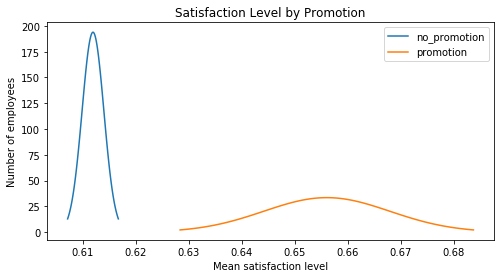

In [83]:
# Plot results
plt.figure(figsize=(8, 4))
plt.plot(x['no_promotion'], normals['no_promotion'].pdf(x['no_promotion']), label = 'no_promotion')
plt.plot(x['promotion'], normals['promotion'].pdf(x['promotion']), label = 'promotion')

# Add annotation
plt.title('Satisfaction Level by Promotion')
plt.xlabel('Mean satisfaction level')
plt.ylabel('Number of employees')
plt.legend()

# Show plot
plt.show()

Comment on your results
* T-tests: The satisfaction level of employees who did not get a promotion in the past 5 years is not significantly different from the overall mean (p < 0.05), while those employees who did get a promotion in the past 5 years have significantly higher satisfaction levels as compared to the overall mean. This implies that while not getting a promotion does not have a measurable effect on satisfaction levels, receiving a promotion increases employee satisfaction.
* Plot: The employees who did not receive an employee in the past 5 years have a peaked distribution right around the overall data mean. Those employees who did receive a promotion have a flattened distribution that is higher and non-overlapping to the other employees, as expected from the t-tests.

#### Question 8

In [90]:
# Compute the power for the hypothesis that the satisfaction level of high paid employees is different than
# that of medium paid employees using a t distribution.

# Effect size between high and medium salary means
effect = ( data[data.salary == 'high'].satisfaction_level.mean() - 
           data[data.salary == 'medium'].satisfaction_level.mean() ) / data.satisfaction_level.std()

# Count ratio between high and medium salaries
count_ratio = len(data[data.salary == 'high']) / len(data[data.salary == 'medium'])

# Compute the power using the desired alpha
sm.TTestIndPower().power(effect, len(data[data.left == 0]), alpha = 0.05, ratio = count_ratio)

0.77046543921945354

## Bootstrapping
Bootstrapping is an immensely useful technique in practice.  Very often you may find yourself in a situation where you want to compute some statistic, but lack sufficient data to do so.  Bootstrapping works as a remedy to this problem.

Recall that the bootstrapping algorithm breaks down as follows:
1. Sample n observations with replacement from the observed data resulting in one simulated complete data set. 
1. Take the statistic of the simulated data set
1. Repeat these two steps B times, resulting in B simulated statistics
1. These statistics are approximately drawn from the sampling distribution of the statistic of n observations
    - This is a lot like what you did when drawing many sample means

In this exercise you will implement this algorithm on the HR data.

Write a function that can perform bootstrapping for the median of a set of n samples in the HR data set.  Test this function on the `satisfaction_level` with `n = 100` and `b = 100` and compare your results to the true median.  Also compute the standard deviation of the bootstrapped median.

In [98]:
# Write a function that can perform bootstrapping for the median of a set of n samples in the HR data set.
def median_bootstrap(data, n, b):
    """ Use bootstrapping to find the medium value of a specified sample within the dataset.
        Inputs:
            - data: column of the dataset to calculate medium
            - n: number of samples to calculate
            - b: number of bootstraps
        Return: Bootstrapped median
    """
    # Retain bootstrapped medians in a list
    medians = []
    # Iterate through data 'b' times
    for i in range(b):
        # Extract sample of size 'n' with replacement and compute median
        new_median = data.sample(n = n, replace = True).median()
        # Add new median to ongoing list
        medians.append(new_median)
    # Return completed list
    return(medians)

In [99]:
# Test function on satisfaction_level with n = 100 and b = 100 and compare results to true median.
true_median = data.satisfaction_level.median()
boot_data = median_bootstrap(data.satisfaction_level, n = 100, b = 100)
boot_median = np.mean(boot_data) # Mean of bootstrapped means

# Print results
print("True median = {}".format(true_median))
print("Bootstrapped median = {}".format(boot_median))

True median = 0.64
Bootstrapped median = 0.6465499999999998


In [102]:
# Compute standard deviation of the bootstrapped median.
boot_std = np.std(boot_data)
boot_std

0.036198722353143906